## E03. 뉴스기사 크롤링 및 분류

### 3-4. BeautifulSoup패키지(HTML, XML로부터 원하는 정보 추출)

In [1]:
from bs4 import BeautifulSoup

In [2]:
#- HTML 문서를 문자열 html로 저장합니다.
html = '''
<html> 
    <head> 
    </head> 
    <body> 
        <h1> 장바구니
            <p id='clothes' class='name' title='라운드티'> 라운드티
                <span class = 'number'> 25 </span> 
                <span class = 'price'> 29000 </span> 
                <span class = 'menu'> 의류</span> 
                <a href = 'http://www.naver.com'> 바로가기 </a> 
            </p> 
            <p id='watch' class='name' title='시계'> 시계
                <span class = 'number'> 28 </span>
                <span class = 'price'> 32000 </span> 
                <span class = 'menu'> 악세서리 </span> 
                <a href = 'http://www.facebook.com'> 바로가기 </a> 
            </p> 
        </h1> 
    </body> 
</html>
'''

#- BeautifulSoup 인스턴스를 생성합니다.
#- 두번째 매개변수는 분석할 분석기(parser)의 종류입니다.
soup = BeautifulSoup(html, 'html.parser')

In [3]:
#. 인스턴스명.select("찾는 정보") 방식으로 사용!
#. class는 "클래스이름", id는 "#아이디"로 선택
print(soup.select('body'))

[<body>
<h1> 장바구니
            <p class="name" id="clothes" title="라운드티"> 라운드티
                <span class="number"> 25 </span>
<span class="price"> 29000 </span>
<span class="menu"> 의류</span>
<a href="http://www.naver.com"> 바로가기 </a>
</p>
<p class="name" id="watch" title="시계"> 시계
                <span class="number"> 28 </span>
<span class="price"> 32000 </span>
<span class="menu"> 악세서리 </span>
<a href="http://www.facebook.com"> 바로가기 </a>
</p>
</h1>
</body>]


In [4]:
#. body tag
print(soup.select('body'))

[<body>
<h1> 장바구니
            <p class="name" id="clothes" title="라운드티"> 라운드티
                <span class="number"> 25 </span>
<span class="price"> 29000 </span>
<span class="menu"> 의류</span>
<a href="http://www.naver.com"> 바로가기 </a>
</p>
<p class="name" id="watch" title="시계"> 시계
                <span class="number"> 28 </span>
<span class="price"> 32000 </span>
<span class="menu"> 악세서리 </span>
<a href="http://www.facebook.com"> 바로가기 </a>
</p>
</h1>
</body>]


In [5]:
#. p tag
print(soup.select('p'))

[<p class="name" id="clothes" title="라운드티"> 라운드티
                <span class="number"> 25 </span>
<span class="price"> 29000 </span>
<span class="menu"> 의류</span>
<a href="http://www.naver.com"> 바로가기 </a>
</p>, <p class="name" id="watch" title="시계"> 시계
                <span class="number"> 28 </span>
<span class="price"> 32000 </span>
<span class="menu"> 악세서리 </span>
<a href="http://www.facebook.com"> 바로가기 </a>
</p>]


In [6]:
# h1 요소 자식 중 class가 menu인 경우만 출력하기
print(soup.select('h1 .name .menu'))

[<span class="menu"> 의류</span>, <span class="menu"> 악세서리 </span>]


### 3-5. newspaper3k 패키지 - 뉴스 데이터 크롤링 전문 패키지

In [55]:
from newspaper import Article

#- 파싱할 뉴스 기사 주소입니다.
url = 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=030&aid=0002881076'

#- 언어가 한국어이므로 language='ko'로 설정해줍니다.
article = Article(url, language='ko')
article.download()
article.parse()

In [56]:
#- 기사 제목을 출력합니다.
print('기사 제목 :')
print(article.title)
print('')

#- 기사 내용을 출력합니다.
print('기사 내용 :')
print(article.text)

기사 제목 :
[AI 사피엔스 시대]자연어처리 기술, 컴퓨팅 파워 경쟁 시대로

기사 내용 :
[Copyright ⓒ 전자신문 & 전자신문인터넷, 무단전재 및 재배포 금지]

주로 아이디어와 기술력으로 경쟁했던 자연어처리 인공지능(AI) 분야는 점차 컴퓨팅 파워 싸움으로 무게 추가 이동하고 있다. 모델이 대형화되면서 향상된 퍼포먼스 확보에 필요한 자금 규모도 커지고 있다. 자칫 대기업 자본력에 휘둘릴 수 있다는 우려도 함께 나온다.자연어처리(NLP)는 인간이 사용하는 언어 체계를 기계가 인식하도록 알고리즘을 디자인하는 기술이다. 흔히 말하는 컴퓨터 혹은 인간과 대화하는 컴퓨터 관련 기술이 포함된다.목적에 따라 세 가지 카테고리로 나뉜다. 인간이 제기한 질문에 자동으로 적절한 답을 찾아주는 '질의응답(QA)', 원하는 업무를 지시했을 때 작업을 수행하는 '테스크 컴플리션', 그리고 특별한 목적이 없는 대화를 의미하는 '오픈도메인 컨버세이션(비목적성 대화)'이 있다. 각기 발전해왔던 세 가지 기술은 지난 2018년 구글의 인공지능 언어모델 '버트(BERT)'의 등장으로 패러다임이 전환됐다. 압도적인 성능으로 대량의 프리트레이닝(사전학습)이 가능해지면서 굳이 셋을 구분할 필요가 없어진 것이다.기계학습 연구에서 모델을 학습할 때는 지도학습과 비지도학습, 강화학습 중 하나를 골라 활용한다. 지도학습은 사람이 적절한 입력과 출력을 부여하는 방식이다. 정답이 정해져 있고 기계의 정답률도 쉽게 측정할 수 있다. 반면에 비지도학습은 정답이 정해지지 않은 데이터에 대해서도 기계가 스스로 클러스터링 등을 통해 학습한다. 체계화되지 않은 대량의 데이터를 학습 가능하지만 학습이 맞게 됐는지 확인하기 어렵다.버트는 기존 AI 학습 방법을 혁신적으로 바꿔놨다는 평가를 받는다. 자연어처리를 교사 없이 양방향으로 사전 학습하는 최초의 시스템이다. 비지도학습 방식을 사용하면서도 기존 존재했던 어떤 기술보다 뛰어난 성능을 보여준다. 최근 1년 반 동안 버트를 필두로 AI 모델은 급격히 대형화되

### 3-7. 네이버 뉴스 기사 크롤링 (2) BeautifulSoup와 newspaper3k를 통해 크롤러 만들기

In [58]:
# 크롤러를 만들기 전 필요한 도구들을 임포트합니다.
import requests
import pandas as pd
from bs4 import BeautifulSoup

# 페이지 수, 카테고리, 날짜를 입력값으로 받습니다.
def make_urllist(page_num, code, date): 
  urllist= []
  for i in range(1, page_num + 1):
    url = 'https://news.naver.com/main/list.nhn?mode=LSD&mid=sec&sid1='+str(code)+'&date='+str(date)+'&page='+str(i)   
    news = requests.get(url)

    # BeautifulSoup의 인스턴스 생성합니다. 파서는 html.parser를 사용합니다.
    soup = BeautifulSoup(news.content, 'html.parser')

    # CASE 1
    news_list = soup.select('.newsflash_body .type06_headline li dl')
    # CASE 2
    news_list.extend(soup.select('.newsflash_body .type06 li dl'))
        
    # 각 뉴스로부터 a 태그인 <a href ='주소'> 에서 '주소'만을 가져옵니다.
    for line in news_list:
        urllist.append(line.a.get('href'))
  return urllist

In [59]:
#. 한 페이지당 뉴스 기사가 20개임을 감안하여 총 40개의 url리스트 받아오기
url_list = make_urllist(2, 101, 20200506)
print('뉴스 기사의 개수: ',len(url_list))

뉴스 기사의 개수:  40


In [60]:
#. 5개만 출력해 보기
url_list[:5]

['https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=057&aid=0001451723',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=057&aid=0001451721',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=057&aid=0001451718',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=003&aid=0009849190',
 'https://news.naver.com/main/read.nhn?mode=LSD&mid=sec&sid1=101&oid=057&aid=0001451717']

==> news url들만 잘 저장되어 리스트를 받아올 수만 있다면 newspaper3k를 이용하여 뉴스기사들을 파이썬에 저장할 수 있다

In [12]:
idx2word = {'101' : '경제', '102' : '사회', '103' : '생활/문화', '105' : 'IT/과학'}

newspaper3k를 통해서 만들어진 함수로 URL 리스트와 해당 URL이 어떤 카테고리인지 코드를 알려주면 이를 통해 데이터프레임을 생성하는 함수

In [3]:
from newspaper import Article

#- 데이터프레임을 생성하는 함수입니다.
def make_data(urllist, code):
  text_list = []
  for url in urllist:
    article = Article(url, language='ko')
    article.download()
    article.parse()
    text_list.append(article.text)

  #- 데이터프레임의 'news' 키 아래 파싱한 텍스트를 밸류로 붙여줍니다.
  df = pd.DataFrame({'news': text_list})

  #- 데이터프레임의 'code' 키 아래 한글 카테고리명을 붙여줍니다.
  df['code'] = idx2word[str(code)]
  return df

경제 카테고리(코드 101)의 40개의 URL 리스트로부터 데이터프레임을 생성

In [14]:
data = make_data(url_list, 101)
#- 상위 10개만 출력해봅니다.
data[:10]

,news,code
0,고려은단이 5월을 맞아 응원 메시지를 공유하는 ‘5월 5글자로 응원 부탁해!’ 이벤...,경제
1,코리아나화장품의 민감성 피부를 위한 저자극 스킨케어 브랜드 '프리엔제'가 마르고 건...,경제
2,서울장수주식회사가 부드럽고 달콤한 맛으로 인기를 모으고 있는 생막걸리 ‘인생막걸리’...,경제
3,[서울=뉴시스] 오동현 기자 = 모바일 게임 기업 컴투스는 3D 모바일 야구 게임 ...,경제
4,대원제약이 2020년 상반기 신입과 경력 정기 공채를 실시합니다.정기 공채 모집분야...,경제
5,"[AFP=연합뉴스] [AFP=연합뉴스]\n\n""요즘은 잔인한 날""…리프트도 앞서 9...",경제
6,이재용 삼성전자 부회장이 6일 삼성전자 서울 서초사옥에서 대국민 사과 회견을 하기 ...,경제
7,JW중외제약이 A형 혈우병 예방요법제 ‘헴리브라피하주사를 출시하고 본격적인 마케팅 ...,경제
8,"옵티팜과 휴벳바이오가 공동 개발중인 백신 후보 물질에 대해 마우스, 기니피그, 미니...",경제
9,[한국경제TV 신동호 기자]\n\n전남 나주시와 충북 청주시가 방사광 가속기 구축사...,경제


### 3-8. 네이버 뉴스 기사 크롤링 (3) 데이터 수집 및 전처리
여러 카테고리에 뉴스들도 수집해보기
-> 특저 날짜의 사회, 생활/문화, IT/과학

In [15]:
# 수집을 원하는 카테고리 코드를을 저장한 리스트를 만들어두기
code_list = [102, 103, 105]

code_list

[102, 103, 105]

코드 리스트, 날짜, 페이지 수를 입력으로 받는 `make_total_data()` 함수 만들기
-> 내부적으로 앞서 만든 `make_urllist` 함수와 `make_data` 함수를 호출하도록 한다

In [16]:
def make_total_data(page_num, code_list, date):
  df = None

  for code in code_list:
    url_list = make_urllist(page_num, code, date)
    df_temp = make_data(url_list, code)
    print(str(code)+'번 코드에 대한 데이터를 만들었습니다.')

    if df is not None:
      df = pd.concat([df, df_temp])
    else:
      df = df_temp

  return df

! 2020. 5. 6 기사에 대해 1페이지 크롤링 실시 + 102, 103, 105번 코드를 갖는 카테고리의 뉴스들을 수집하여 DF에 저장
+ 크롤링은 웹에서 데이터를 받아오는 과정이 포함되어 시간이 많이 걸릴 수 있다

In [17]:
df = make_total_data(1, code_list, 20200506)

102번 코드에 대한 데이터를 만들었습니다.
103번 코드에 대한 데이터를 만들었습니다.
105번 코드에 대한 데이터를 만들었습니다.


In [18]:
print('뉴스 기사의 개수: ',len(df))

뉴스 기사의 개수:  60


60개 중 임의의 10개 샘플 선택하여 출력하기

In [19]:
df.sample(10)

,news,code
12,기사 섹션 분류 안내\n\n기사의 섹션 정보는 해당 언론사의 분류를 따르고 있습니다...,생활/문화
10,/사진=뉴스1 /사진=뉴스1\n\n[파이낸셜뉴스] 과학기술정보통신부가 6일 1조원대...,IT/과학
8,"6일 등교수업을 앞둔 경북 한 학교의 보건실에는 손소독제, 마스크 등 방역물품이 상...",사회
3,©아가타 파리(AGATHA PARIS) ©아가타 파리(AGATHA PARIS)\n\...,생활/문화
4,(서울=연합뉴스) 대한약사회가 6일부터 코로나바이러스 감염증 대응 체계를 '사회적 ...,사회
12,동영상 뉴스\n\n[앵커]다음 주 고등학교 3학년부터 순차적인 등교수업이 시작되는데...,사회
15,/뉴스1 DB. /뉴스1 DB.\n\n(서울=뉴스1) 이상학 기자 = 밤에 귀가하던...,사회
4,EBS '까칠남녀'에 출연한 정영진/EBS EBS '까칠남녀'에 출연한 정영진/EB...,생활/문화
13,블랙홀을 품은 삼중성계 HR 6819 상상도 [ESO/L. Calcada 제공/ 재...,IT/과학
17,바티칸의 사도궁 집무실에서 6일(현지시간) 인터넷 중계 방식의 수요 일반 알현 훈화...,생활/문화


__수집한 데이터의 샘플들을 랜덤으로 여러 번 출력해 보는 것은 데이터를 파악하는데 꽤 큰 도움__

### 대량 크롤링
수집 데이터로 ML모델을 통해 카테고리 예측하는 모델 - 3개 카테고리에 대한 100여개 페이지 크롤링(40~50분 소요)
- ! 너무 많은 페이지를 수집하면 시간이 너무 오래 소요되거나, 서버에서 접근을 거부할 수 있습니다. 적당한 규모로 수집해 주세요.

In [20]:
# 아래 주석처리된 코드의 주석을 해제하고 실행을 하면 대량 크롤링이 진행됩니다. 
# 위에서 수행했던 크롤링의 100배 분량이 수행될 것입니다. 한꺼번에 너무 많은 크롤링 요청이 서버에 전달되지 않도록 주의해 주세요. 
# 기사 일자를 바꿔보면서 데이터를 모으면 더욱 다양한 데이터를 얻을 수 있게 됩니다. 

#df = make_total_data(100, code_list, 20200506)

In [19]:
# 크롤링한 뉴스 기사의 양이 많으므로 실수로 유실하지 않도록 csv 파일로 별도 저장

import os

# 데이터프레임 파일을 csv 파일로 저장합니다.
# 저장경로는 이번 프로젝트를 위해 만든 폴더로 지정해 주세요.
csv_path = os.getenv("HOME") + "/aiffel/news_crawler/news_data.csv"
df.to_csv(csv_path, index=False)

if os.path.exists(csv_path):
  print('{} File Saved!'.format(csv_path))

/home/aiffel/aiffel/news_crawler/news_data.csv File Saved!


### 3-9. naver news article crawling (4) data preprocessing\
데이터를 가공/정제하여 모델의 훈련에 사용하기 좋은 숫자의 형태로 바꿔준다

In [51]:
#. 저장해둔 csv파일을 다시 읽어서 dataframe으로 저장하기 위한 코드
import os
csv_path = os.getenv("HOME") + "/aiffel/news_crawler/news_data.csv"
df = pd.read_table(csv_path, sep=',')
df.head()

,news,code
0,파주시청. 사진제공=파주시 파주시청. 사진제공=파주시\n\n[파주=파이낸셜뉴스 강근...,사회
1,동영상 뉴스\n\n이천 물류창고 화재 발화지점으로 지목된 지하 2층에서 산소절단기의...,사회
2,황범순 의정부시 부시장 을지대학교 의정부캠퍼스 및 부속병원 공사현장 안전점검. 사진...,사회
3,귀갓길 여성을 쫓아가 성범죄를 시도한 20대 남성이 구속됐습니다.서울 강남경찰서는 ...,사회
4,(서울=연합뉴스) 대한약사회가 6일부터 코로나바이러스 감염증 대응 체계를 '사회적 ...,사회


In [52]:
# 정규 표현식을 이용해서 한글 외의 문자는 전부 제거
df['news'] = df['news'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
df['news']

0     파주시청 사진제공파주시 파주시청 사진제공파주시파주파이낸셜뉴스 강근주 기자 파주시는 ...
1     동영상 뉴스이천 물류창고 화재 발화지점으로 지목된 지하 층에서 산소절단기의 산소 공...
2     황범순 의정부시 부시장 을지대학교 의정부캠퍼스 및 부속병원 공사현장 안전점검 사진제...
3     귀갓길 여성을 쫓아가 성범죄를 시도한 대 남성이 구속됐습니다서울 강남경찰서는 강간상...
4     서울연합뉴스 대한약사회가 일부터 코로나바이러스 감염증 대응 체계를 사회적 거리두기에...
5     질서정연 코로나 확산 방지를 위한 물리적 거리 두기가 생활 속 거리 두기로 전환된 ...
6     코로나에 걸렸다 나은 친구는 아무래도 좀 멀리하게 될 것 같아요 재발 가능성 때문에...
7     년 메이저리그  다저스의 시즌 마지막 경기였다 신인 타자 더스티 베이커현 휴스턴 애...
8     일 등교수업을 앞둔 경북 한 학교의 보건실에는 손소독제 마스크 등 방역물품이 상자째...
9     경찰 로고뉴스   신채린 기자 경찰 로고뉴스   신채린 기자서울뉴스 이상학 기자  ...
10    안병용 의정부시장 이천화재 희생자 합동분향소 헌화 사진제공의정부시 안병용 의정부시장...
11    이재용 삼성전자 부회장의 일 대국민 사과가 그를 상대로 한 수사재판에 어떤 영향을 ...
12    동영상 뉴스앵커다음 주 고등학교 학년부터 순차적인 등교수업이 시작되는데 교실 방역에...
13    명의 사망자가 발생한 경기 이천 물류창고 화재 현장에서 일 경찰과 소방 등 관계기관...
14    동영상 뉴스앵커코로나 신규 확진자가 명 발생해 일 만에 최저치를 기록했습니다방역 당...
15    뉴스  뉴스 서울뉴스 이상학 기자  밤에 귀가하던 여성에게 성범죄를 시도한 대 남성...
16    메건 마클 왕자비와 아들 아치의 모습세이브더칠드런 인스타그램 캡처 재판매 및  금지...
17    국내 최초로 건립되는 노동문학관이 일 첫 삽을 떴다노동문학관건립위원회위원장 

In [7]:
# data에 null값이 있진 않은지 확인
print(df.isnull().sum())

news    0
code    0
dtype: int64


In [53]:
# 중복된 샘플들을 제거합니다.
df.drop_duplicates(subset=['news'], inplace=True)

print('뉴스 기사의 개수: ',len(df))

뉴스 기사의 개수:  53


데이터 탐색
---
각 카테고리별 샘플 분포 확인 -> matplotlib에 한글폰트 적용안될 수 있음 주의
[matplotlib 한글폰트 설정방법](https://followers.tistory.com/26)

<AxesSubplot:>

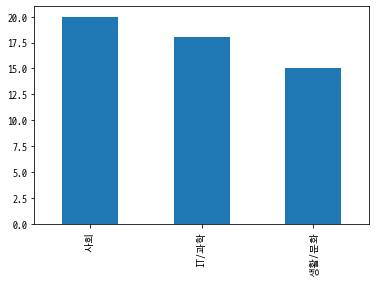

In [50]:
df['code'].value_counts().plot(kind = 'bar')

Text(0.3, 0.3, '한글')

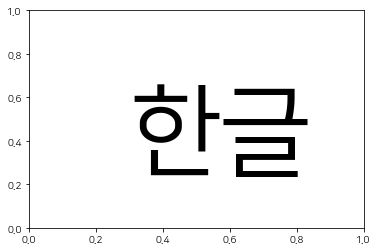

In [16]:
#. 한글 삽질의 시작
import matplotlib.pyplot as plt
plt.text(0.3, 0.3, '한글', size=100)

In [49]:
from matplotlib import font_manager as fm
font_location='/home/aiffel/.local/share/fonts/D2CodingBold-Ver1.3.2-20180524-ligature.ttf'
font_name=fm.FontProperties(fname=font_location).get_name()
plt.rc('font',family=font_name)

Text(0.3, 0.3, '한글')

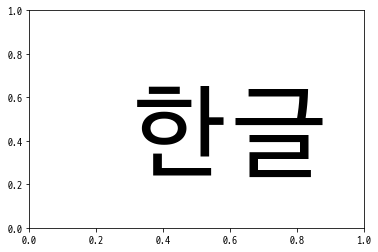

In [33]:
plt.text(0.3, 0.3, '한글', size=100)

In [18]:
# 글꼴 이름 찾기
from matplotlib import font_manager 

In [34]:
for font in font_manager.fontManager.ttflist:
    if 'Nanum' in font.name:
        print(font.name, font.fname)

NanumBarunpen /usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf
NanumMyeongjo /usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf
NanumMyeongjo Eco /usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf
NanumBarunGothic /usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf
NanumSquareRound /usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf
NanumGothic /usr/share/fonts/truetype/nanum/NanumGothic.ttf
NanumSquare /usr/share/fonts/truetype/nanum/NanumSquareEB.ttf
NanumGothic Eco /usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf
NanumMyeongjo /usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf
NanumGothic /usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf
NanumMyeongjo /usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf
NanumBarunpen /usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf
NanumGothic Eco /usr/share/fonts/truetype/nanum/NanumGothicEcoBold.ttf
NanumMyeongjo Eco /usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf
NanumSquareRound /usr/share/fo

In [41]:
import matplotlib as mpl
print ('버전: ', mpl.__version__)
print ('설치 위치: ', mpl.__file__)
print ('설정 위치: ', mpl.get_configdir())
print ('캐시 위치: ', mpl.get_cachedir())

버전:  3.3.0
설치 위치:  /home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/__init__.py
설정 위치:  /home/aiffel/.config/matplotlib
캐시 위치:  /home/aiffel/.cache/matplotlib


In [35]:
print ('설정 파일 위치: ', mpl.matplotlib_fname())

font_list = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

# ttf 폰트 전체개수
print(len(font_list))

설정 파일 위치:  /home/aiffel/anaconda3/envs/aiffel/lib/python3.7/site-packages/matplotlib/mpl-data/matplotlibrc
261


In [36]:
print(font_list)

['/usr/share/fonts/truetype/noto/NotoMono-Regular.ttf', '/usr/share/fonts/truetype/openoffice/opens___.ttf', '/home/aiffel/.local/share/fonts/FiraCode-Retina.ttf', '/usr/share/fonts/truetype/ubuntu/Ubuntu-BI.ttf', '/usr/share/fonts/truetype/fonts-beng-extra/LikhanNormal.ttf', '/usr/share/fonts/truetype/liberation2/LiberationSerif-Regular.ttf', '/usr/share/fonts/truetype/sinhala/lklug.ttf', '/usr/share/fonts/truetype/tlwg/TlwgTypo-Oblique.ttf', '/usr/share/fonts/opentype/noto/NotoSansCJK-Regular.ttc', '/usr/share/fonts/truetype/ubuntu/UbuntuMono-RI.ttf', '/usr/share/fonts/truetype/liberation2/LiberationSans-Bold.ttf', '/usr/share/fonts/truetype/tlwg/Sawasdee-BoldOblique.ttf', '/usr/share/fonts/truetype/tlwg/Sawasdee-Oblique.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareR.ttf', '/usr/share/fonts/truetype/liberation2/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/tlwg/Garuda-BoldOblique.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf', '/usr/share/fonts/truetype/tlwg/

In [43]:
f = [f.name for f in font_manager.fontManager.ttflist]

In [38]:
f

['STIXNonUnicode',
 'DejaVu Serif',
 'STIXSizeFiveSym',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'DejaVu Serif',
 'DejaVu Serif',
 'DejaVu Sans',
 'STIXSizeOneSym',
 'cmex10',
 'STIXSizeTwoSym',
 'DejaVu Sans Mono',
 'cmmi10',
 'DejaVu Sans Mono',
 'STIXGeneral',
 'STIXGeneral',
 'cmtt10',
 'cmss10',
 'DejaVu Sans Display',
 'STIXSizeOneSym',
 'STIXGeneral',
 'STIXGeneral',
 'cmr10',
 'DejaVu Serif',
 'STIXSizeThreeSym',
 'DejaVu Sans',
 'cmsy10',
 'STIXSizeFourSym',
 'STIXSizeFourSym',
 'DejaVu Sans',
 'DejaVu Serif Display',
 'STIXSizeThreeSym',
 'DejaVu Sans Mono',
 'STIXNonUnicode',
 'STIXNonUnicode',
 'DejaVu Sans',
 'cmb10',
 'STIXSizeTwoSym',
 'Noto Serif CJK JP',
 'OpenSymbol',
 'Laksaman',
 'Manjari',
 'Liberation Serif',
 'LKLUG',
 'Meera',
 'Lohit Telugu',
 'Manjari',
 'Dyuthi',
 'Tlwg Typo',
 'AnjaliOldLipi',
 'Tlwg Typewriter',
 'Norasi',
 'Umpush',
 'KacstFarsi',
 'KacstBook',
 'Sarai',
 'Umpush',
 'Garuda',
 'FreeMono',
 'KacstTitleL',
 'Norasi',
 'Khmer OS System',
 'Ub

In [44]:
[(f.name, f.fname) for f in font_manager.fontManager.ttflist if 'anum' in f.name]

[('NanumBarunpen', '/usr/share/fonts/truetype/nanum/NanumBarunpenB.ttf'),
 ('NanumMyeongjo',
  '/usr/share/fonts/truetype/nanum/NanumMyeongjoExtraBold.ttf'),
 ('NanumMyeongjo Eco', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf'),
 ('NanumBarunGothic',
  '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf'),
 ('NanumSquareRound', '/usr/share/fonts/truetype/nanum/NanumSquareRoundL.ttf'),
 ('NanumGothic', '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'),
 ('NanumSquare', '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf'),
 ('NanumGothic Eco',
  '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf'),
 ('NanumMyeongjo', '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf'),
 ('NanumGothic', '/usr/share/fonts/truetype/nanum/NanumGothicExtraBold.ttf'),
 ('NanumMyeongjo', '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf'),
 ('NanumBarunpen', '/usr/share/fonts/truetype/nanum/NanumBarunpenR.ttf'),
 ('NanumGothic Eco', '/usr/share/fonts/truetype/nanum/NanumGot

In [46]:
mpl.get_cachedir()

'/home/aiffel/.cache/matplotlib'

In [47]:
# 폰트 설정 방법 2
import matplotlib
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()

['/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Italic.ttf',
 '/usr/share/fonts/opentype/noto/NotoSerifCJK-ExtraLight.ttc',
 '/usr/share/fonts/opentype/noto/NotoSansCJK-DemiLight.ttc',
 '/usr/share/fonts/opentype/noto/NotoSansCJK-Medium.ttc',
 '/usr/share/fonts/truetype/tlwg/TlwgMono-Oblique.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf',
 '/home/aiffel/.local/share/fonts/D2Coding-Ver1.3.2-20180524-ligature.ttf',
 '/usr/share/fonts/truetype/ubuntu/Ubuntu-M.ttf',
 '/usr/share/fonts/truetype/tlwg/TlwgTypewriter-BoldOblique.ttf',
 '/usr/share/fonts/truetype/noto/NotoMono-Regular.ttf',
 '/usr/share/fonts/truetype/tlwg/Umpush-BoldOblique.ttf',
 '/usr/share/fonts/opentype/firacode/FiraCode-Retina.otf',
 '/usr/share/fonts/truetype/tlwg/Umpush-LightOblique.ttf',
 '/usr/share/fonts/opentype/noto/NotoSerifCJK-SemiBold.ttc',
 '/usr/share/fonts/truetype/kacst/KacstTitleL.ttf',
 '/usr/share/fonts/opentype/noto/

In [30]:
font_location='/home/aiffel/.local/share/fonts/D2Coding-Ver1.3.2-20180524-ligature.ttf'
font_name=fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font',family=font_name)

In [ ]:
저도 왜 되는지는 모르겠지만 좀 다른 방법으로 한글이 나와서 공유해봅니다. 틀린 부분 있을경우 팩트폭력 환영합니다!
1. (확인용) 터미널에서 fc-list :lang=ko | grep D2  (혹은 Nanum 같은 한글폰트명) 명령어를 입력해 원하시는 .ttf 폰트가 자리한 위치를 알아둡니다
2. 주피터 노트북에서 
```import matplotlib
import matplotlib.font_manager as fm
fm.get_fontconfig_fonts()
를 돌리시면 .ttf 리스트가 쭉 나옵니다. 원하시는 폰트의 경로를 ~~~.ttf까지 복사하시면 됩니다
3. ```font_location='/home/aiffel/.local/share/fonts/D2Coding-Ver1.3.2-20180524-ligature.ttf'
font_name=fm.FontProperties(fname=font_location).get_name()
matplotlib.rc('font',family=font_name)
이런 식으로 font_location='경로' 만 수정해주시고 실행하신다음
모든 터미널을 끄고 다시 커널을 연결하면 한글이 나오는 것을 확인하였습니다!